## Perturbation
##### Charlie Walker

## Exercise 2

In [296]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp
from sympy import symbols, diff
from sympy.utilities.lambdify import lambdify
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import ar1_approx as ar1

In [2]:
alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

In [3]:
def error_n(w, *args):
    alpha, z, k, b, t, h = args
    nd = ((1 - alpha) * z/w) ** (1/alpha) * k
    pi = z * k ** alpha* nd ** (1 - alpha) - w * nd
    ns = h - b/(w * (1 + b)) * (w * h + pi -t)
    return nd - ns

In [4]:
args = (alpha, z, k, b, t, h)
w = opt.fsolve(error_n, 0.8, args = (args))[0]
print(w)

0.627361779044


In [5]:
def first_deriv(f, x0, h=1e-2):
    return (f(x0+h)-f(x0-h))/(2*h)

def second_deriv(f, x0, h=1e-2):
    return (f(x0+h)+f(x0-h)-2*f(x0))/(h**2)

def get_wss(k1, w_init):
    args = (alpha, z, k1, b, t, h)
    w = opt.fsolve(error_n, w_init, args = (args))[0]
    return w

def first_approx(f, x0, x):
    fp = first_deriv(f, x0)
    return f(x0) + fp * (x - x0)
    
def second_approx(f, x0, x):
    fp = first_deriv(f, x0)
    fpp = second_deriv(f, x0)
    return f(x0) + fp * (x - x0) + (1/2) * fpp * (x - x0) ** 2

f = lambda x: get_wss(x, 0.8)
print(first_approx(f, 5, 5.1))
print(second_approx(f, 5, 5.1))

0.631520359783
0.631492497797


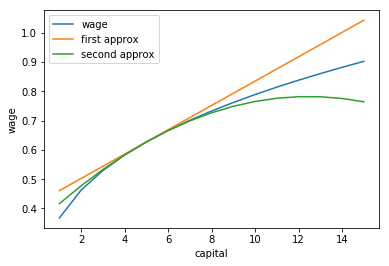

In [6]:
kgrid = np.linspace(1, 15, 15)
wgrid1 = np.zeros_like(kgrid)
wgrid2 = np.zeros_like(kgrid)
wgrid3 = np.zeros_like(kgrid)
for i in range(3):
    wgrid1[i] = get_wss(kgrid[i], 0.3)
for i in range(3, 15):
    wgrid1[i] = get_wss(kgrid[i], 0.8)
for i in range(15):
    wgrid2[i] = first_approx(f, 5, kgrid[i]) 
    wgrid3[i] = second_approx(f, 5, kgrid[i]) 
plt.plot(kgrid, wgrid1, label='wage')
plt.plot(kgrid, wgrid2, label='first approx')
plt.plot(kgrid, wgrid3, label ='second approx')
plt.legend()
plt.xlabel('capital')
plt.ylabel('wage')
plt.show()

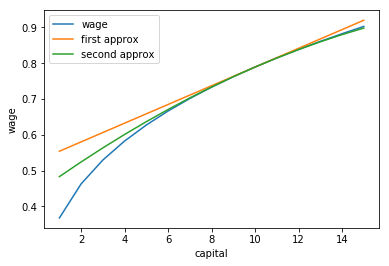

In [7]:
kgrid = np.linspace(1, 15, 15)
wgrid1 = np.zeros_like(kgrid)
wgrid2 = np.zeros_like(kgrid)
wgrid3 = np.zeros_like(kgrid)
for i in range(3):
    wgrid1[i] = get_wss(kgrid[i], 0.3)
for i in range(3, 15):
    wgrid1[i] = get_wss(kgrid[i], 0.8)
for i in range(15):
    wgrid2[i] = first_approx(f, 10, kgrid[i]) 
    wgrid3[i] = second_approx(f, 10, kgrid[i]) 
plt.plot(kgrid, wgrid1, label='wage')
plt.plot(kgrid, wgrid2, label='first approx')
plt.plot(kgrid, wgrid3, label ='second approx')
plt.legend()
plt.xlabel('capital')
plt.ylabel('wage')
plt.show()

## Exercise 3

In [71]:
x, y = symbols('x y')
f = (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)
Fx = diff(f, x)
Fy = diff(f, y)
Fxx = diff(Fx, x)
Fxy = diff(Fx, y)
Fyy = diff(Fy, y)
Fxxx = diff(Fxx, x)
Fxxy = diff(Fxx, y)
Fxyy = diff(Fxy, y)
Fyyy = diff(Fyy, y)

Fx = lambdify((x,y), Fx, 'numpy')
Fy = lambdify((x,y), Fy, 'numpy')
Fxx = lambdify((x,y), Fxx, 'numpy')
Fxy = lambdify((x,y), Fxy, 'numpy')
Fyy = lambdify((x,y), Fyy, 'numpy')
Fxxx = lambdify((x,y), Fxxx, 'numpy')
Fxxy = lambdify((x,y), Fxxy, 'numpy')
Fxyy = lambdify((x,y), Fxyy, 'numpy')
Fyyy = lambdify((x,y), Fyyy, 'numpy')

xy = lambda x, y: -Fy(x,y)/Fx(x,y)
xyy = lambda x, y: -(Fxx(x,y)*xy(x,y) + 2*Fxy(x,y)*xy(x,y) + Fyy(x,y))/Fx(x,y)
xyyy = lambda x, y: -(Fxxx(x,y)*xy(x,y)**3+3*Fxxy(x,y)*xy(x,y)**2+3*Fxx(x,y)*xyy(x,y)*xy(x,y)+3*Fxyy(x,y)*xy(x,y)+
         3*Fxy(x,y)*xyy(x,y)+Fyyy(x,y))/Fx(x,y)

In [72]:
def get_y(y, arg):
    x = arg
    return (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)

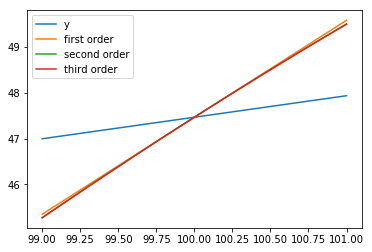

In [73]:
y0 = opt.fsolve(get_y, 49, args = (100))
x0 = 100
xgrid = np.linspace(99, 101, 30)
ygrid1 = np.zeros_like(xgrid)
ygrid2 = np.zeros_like(xgrid)
ygrid3 = np.zeros_like(xgrid)
ygrid4 = np.zeros_like(xgrid)
for i in range(30):
    ygrid1[i] = opt.fsolve(get_y, 49, args = (xgrid[i]))
y1 = ygrid1[0]
y2 = ygrid1[-1]
ygrid = np.linspace(y1, y2, 30)
for i in range(30):
    ygrid2[i] = y0+xy(x0, y0)*(xgrid[i]-x0)
    ygrid3[i] = y0+xy(x0, y0)*(xgrid[i]-x0) + (1/2)*xyy(x0, y0)*(xgrid[i]-x0) ** 2
    ygrid4[i] = y0+xy(x0, y0)*(xgrid[i]-x0)+(1/2)*xyy(x0, y0)*(xgrid[i]-x0)**2+(1/6)*\
               xyyy(x0, y0)*(xgrid[i]-x0)**3 
plt.plot(xgrid, ygrid1, label='y')
plt.plot(xgrid, ygrid2, label='first order')
plt.plot(xgrid, ygrid3, label='second order')
plt.plot(xgrid, ygrid4, label='third order')

plt.legend()
plt.show()

## Exercise 4
We have calculated in previous exercise that 
$$H_x=X_u=-\frac{F_u}{F_x}=\frac{(e^{z_1}k_1^\alpha-k_2)(\alpha k_0^{\alpha-1}k_1e^{z_0})}{k_0^{\alpha}k_1^{\alpha}e^{z_0+z_1}+(\alpha-1)k_2e^{z_0}k_0^{\alpha}-\alpha k_1k_2}=0.35$$. Now we will use Sympy to calculate $X_{uu}$

In [11]:
alpha = 0.35
beta = 0.98 
k = (alpha * beta) ** (1/(1 - alpha))
xu = 0.35

In [12]:
x, y, u, a, b = symbols('x y u a b')
f = 1/(u ** a - x) - b * a * x ** (a - 1)/(x ** a - y)
Fx = diff(f, x)
Fy = diff(f, y)
Fyy = diff(Fy, y)
Fyx = diff(Fy, x)
Fyu = diff(Fy, u)
Fxx = diff(Fx, x)
Fxu = diff(Fx, u)
Fuu = diff(diff(f, u), u)

Fx = lambdify((x, y, u, a, b), Fx, 'numpy')
Fy = lambdify((x, y, u, a, b), Fy, 'numpy')
Fyy = lambdify((x, y, u, a, b), Fyy, 'numpy')
Fxx = lambdify((x, y, u, a, b), Fxx, 'numpy')
Fyx = lambdify((x, y, u, a, b), Fyx, 'numpy')
Fyu = lambdify((x, y, u, a, b), Fyu, 'numpy')
Fxu = lambdify((x, y, u, a, b), Fxu, 'numpy')
Fuu = lambdify((x, y, u, a, b), Fuu, 'numpy')

Fx = Fx(k,k,k,alpha,beta)
Fy = Fy(k,k,k,alpha,beta)
Fyy = Fyy(k,k,k,alpha,beta)
Fyx = Fyx(k,k,k,alpha,beta)
Fxx = Fxx(k,k,k,alpha,beta)
Fyu = Fyu(k,k,k,alpha,beta)
Fxu = Fxu(k,k,k,alpha,beta)
Fuu = Fuu(k,k,k,alpha,beta)

xuu = -(Fyy*xu**4+2*Fyx*xu**3+2*Fyu*xu**2+Fxx*xu**2+2*Fxu*xu+Fuu)/(Fy*xu**2+Fy*xu+Fx)
print('xuu: '+str(xuu))

xuu: -1.1800856355648073


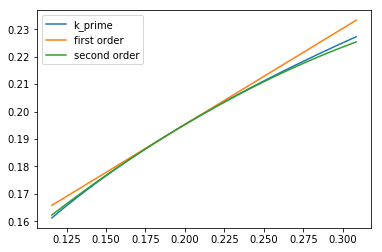

In [13]:
kgrid = np.linspace(0.6*k, 1.6*k, 25)
k1 = alpha * beta * kgrid ** alpha
k2 = np.zeros(25)
k3 = np.zeros(25)
for i in range(25):
    k2[i] = k + xu * (kgrid[i] - k)
    k3[i] = k + xu * (kgrid[i] - k) + (1/2) * xuu * (kgrid[i] - k) ** 2
plt.plot(kgrid, k1, label='k_prime')
plt.plot(kgrid, k2, label='first order')
plt.plot(kgrid, k3, label = 'second order')
plt.legend()
plt.show()

## Exercise 5

In [158]:
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
kbar = (alpha * beta) ** (1/(1 - alpha))
zbar = 0

In [159]:
# Solve for F, G, H, L, M numerically
def Lin_SS(k2=kbar, k1=kbar, k=kbar, z1=zbar, z=zbar):
    SS = (alpha * beta * np.exp(z1) * k1 ** (alpha - 1) * (np.exp(z) * k ** alpha - k1))/(np.exp(z1) * k1 ** alpha - k2)-1
    return SS

In [229]:
e = 0.001

F = (Lin_SS(k2=kbar+e) - Lin_SS(k2=kbar-e))/(2 * e)
G = (Lin_SS(k1=kbar+e) - Lin_SS(k1=kbar-e))/(2 * e)
H = (Lin_SS(k=kbar+e) - Lin_SS(k=kbar-e))/(2 * e)   
L = (Lin_SS(z1=zbar+e) - Lin_SS(z1=zbar-e))/(2 * e)
M = (Lin_SS(z=zbar+e) - Lin_SS(z=zbar-e))/(2 * e)
N = 0.95
Gamma_A = np.array([F, G, H, L, M])

Hx = (-G - np.sqrt(G ** 2 - 4 * F * H))/(2 * F)
Hz = -(L * N + M)/(F * N + F * Hx + G)
print(Hx)
print(Hz)

0.349986889061
0.192771173572


In [246]:
# Calculate Fs
Fs = np.zeros((5, 3))
Fs[0, 0] = Hx * Hx
Fs[0, 1] = Hx * Hz + Hz * N
Fs[1, 0] = Hx
Fs[1, 1] = Hz
Fs[2, 0] = 1
Fs[3, 1] = N
Fs[4, 1] = 1

# Calculate gamma_AA
Gamma_AA = np.zeros((5, 5))

keys = ['k2', 'k1', 'k', 'z1', 'z']
values = [kbar, kbar, kbar, zbar, zbar]

for i in range(5):
    for j in range(5):
        if i == j:
            L =dict(zip(keys, values))
            L[keys[i]] = values[i] + e
            
            J = dict(zip(keys, values))
            J[keys[i]] = values[i] - e
            K = dict(zip(keys, values))
            Gamma_AA[i, i] = (Lin_SS(**L) - 2 * Lin_SS(**K)+ Lin_SS(**J))/(e ** 2)
        else:
            G = dict(zip(keys, values))
            G[keys[i]] = values[i] + e
            G[keys[j]] = values[j] + e
            
            E = dict(zip(keys, values))
            E[keys[i]] = values[i] - e
            E[keys[j]] = values[j] + e
            
            R = dict(zip(keys, values))
            R[keys[i]] = values[i] + e
            R[keys[j]] = values[j] - e
            
            P = dict(zip(keys, values))
            P[keys[i]] = values[i] - e
            P[keys[j]] = values[j] - e
            
            Gamma_AA[i, j] = (Lin_SS(**G)-Lin_SS(**E)-Lin_SS(**R)+Lin_SS(**P))/(4 * e ** 2)

Lambda = np.dot(np.dot(np.kron(Fs.T, np.identity(1)), (Gamma_AA)), Fs)
Lambda[2,2] = Hz * Gamma_AA[0,0] * Hz
print(Gamma_AA)
print(Lambda)

[[  14.66746051  -31.43312921    7.48343421   -5.53579765    4.12191243]
 [ -31.43312921  105.31275749  -16.95380951    6.05970275   -9.33824181]
 [   7.48343421  -16.95380951   -9.31718106   -1.44266686    2.76335677]
 [  -5.53579765    6.05970275   -1.44266686    1.06718515   -0.79462801]
 [   4.12191243   -9.33824181    2.76335677   -0.79462801    1.52207014]]
[[-8.92627019  2.66348982  0.        ]
 [ 2.66348982  0.82231848  0.        ]
 [ 0.          0.          0.54505347]]


In [262]:
def Fss(soln):
    '''soln = np.array([Hxx, Hxz, Hzz, Hvv])'''
    Fss = np.zeros((15,3))
    Fss[0,:] = np.array([soln[0]*Hx*Hx + Hx*soln[0], soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, 0])
    Fss[1,:] = np.array([soln[0], soln[1], 0])
    Fss[5,:] = np.array([soln[0]*Hx*Hz + Hx*soln[1] + soln[1]*Hx*N, soln[1]*N*Hz + Hx*soln[2] + soln[2]*N*N, 0])
    Fss[6,:] = np.array([soln[1], soln[2], 0])
    Fss[10,:] = np.array([0, 0, Hx*soln[3] + soln[3]])
    Fss[11,:] = np.array([0, 0, soln[3]])
    
    error = Lambda + np.dot(np.kron(np.identity(3), Gamma_A), Fss)
    return np.array([error[0, 0], error[0, 1], error[1, 0], error[1, 1]])

In [280]:
theta_guess = np.zeros(4) + 0.2
Hxx, Hxz, Hzz, Hvv = opt.fsolve(Fss, theta_guess)
print(Hxx)
print(Hxz)
print(Hzz)
print(Hvv)

-1.18876493818
0.345039683741
0.179026860247
1.32499382613


In [285]:
# Plot policy funciton
# K grid
k_lb = 0.5 * k_bar
k_ub = 1.5 * k_bar
kgrid = np.linspace(k_lb, k_ub, 25)
sizek = len(kgrid)

# z grid
step = 10 * sigma/25
pi, zgrid = ar1.rouwen(rho, 0, step, 25)
sizez = len(zgrid)

optk = np.zeros((sizek, sizez))
for i in range(sizek):
    optk[i,:] = Hx * (kgrid[i] - kbar) + Hz * (zgrid - 0) + (1/2) * (Hxx * (kgrid[i] - kbar) ** 2\
                                                                          + Hzz * (zgrid[i] - zbar) ** 2\
                                                                          +2 * Hxz * (kgrid[i] - kbar) * (zgrid[i] - zbar)) + kbar

<IPython.core.display.Javascript object>


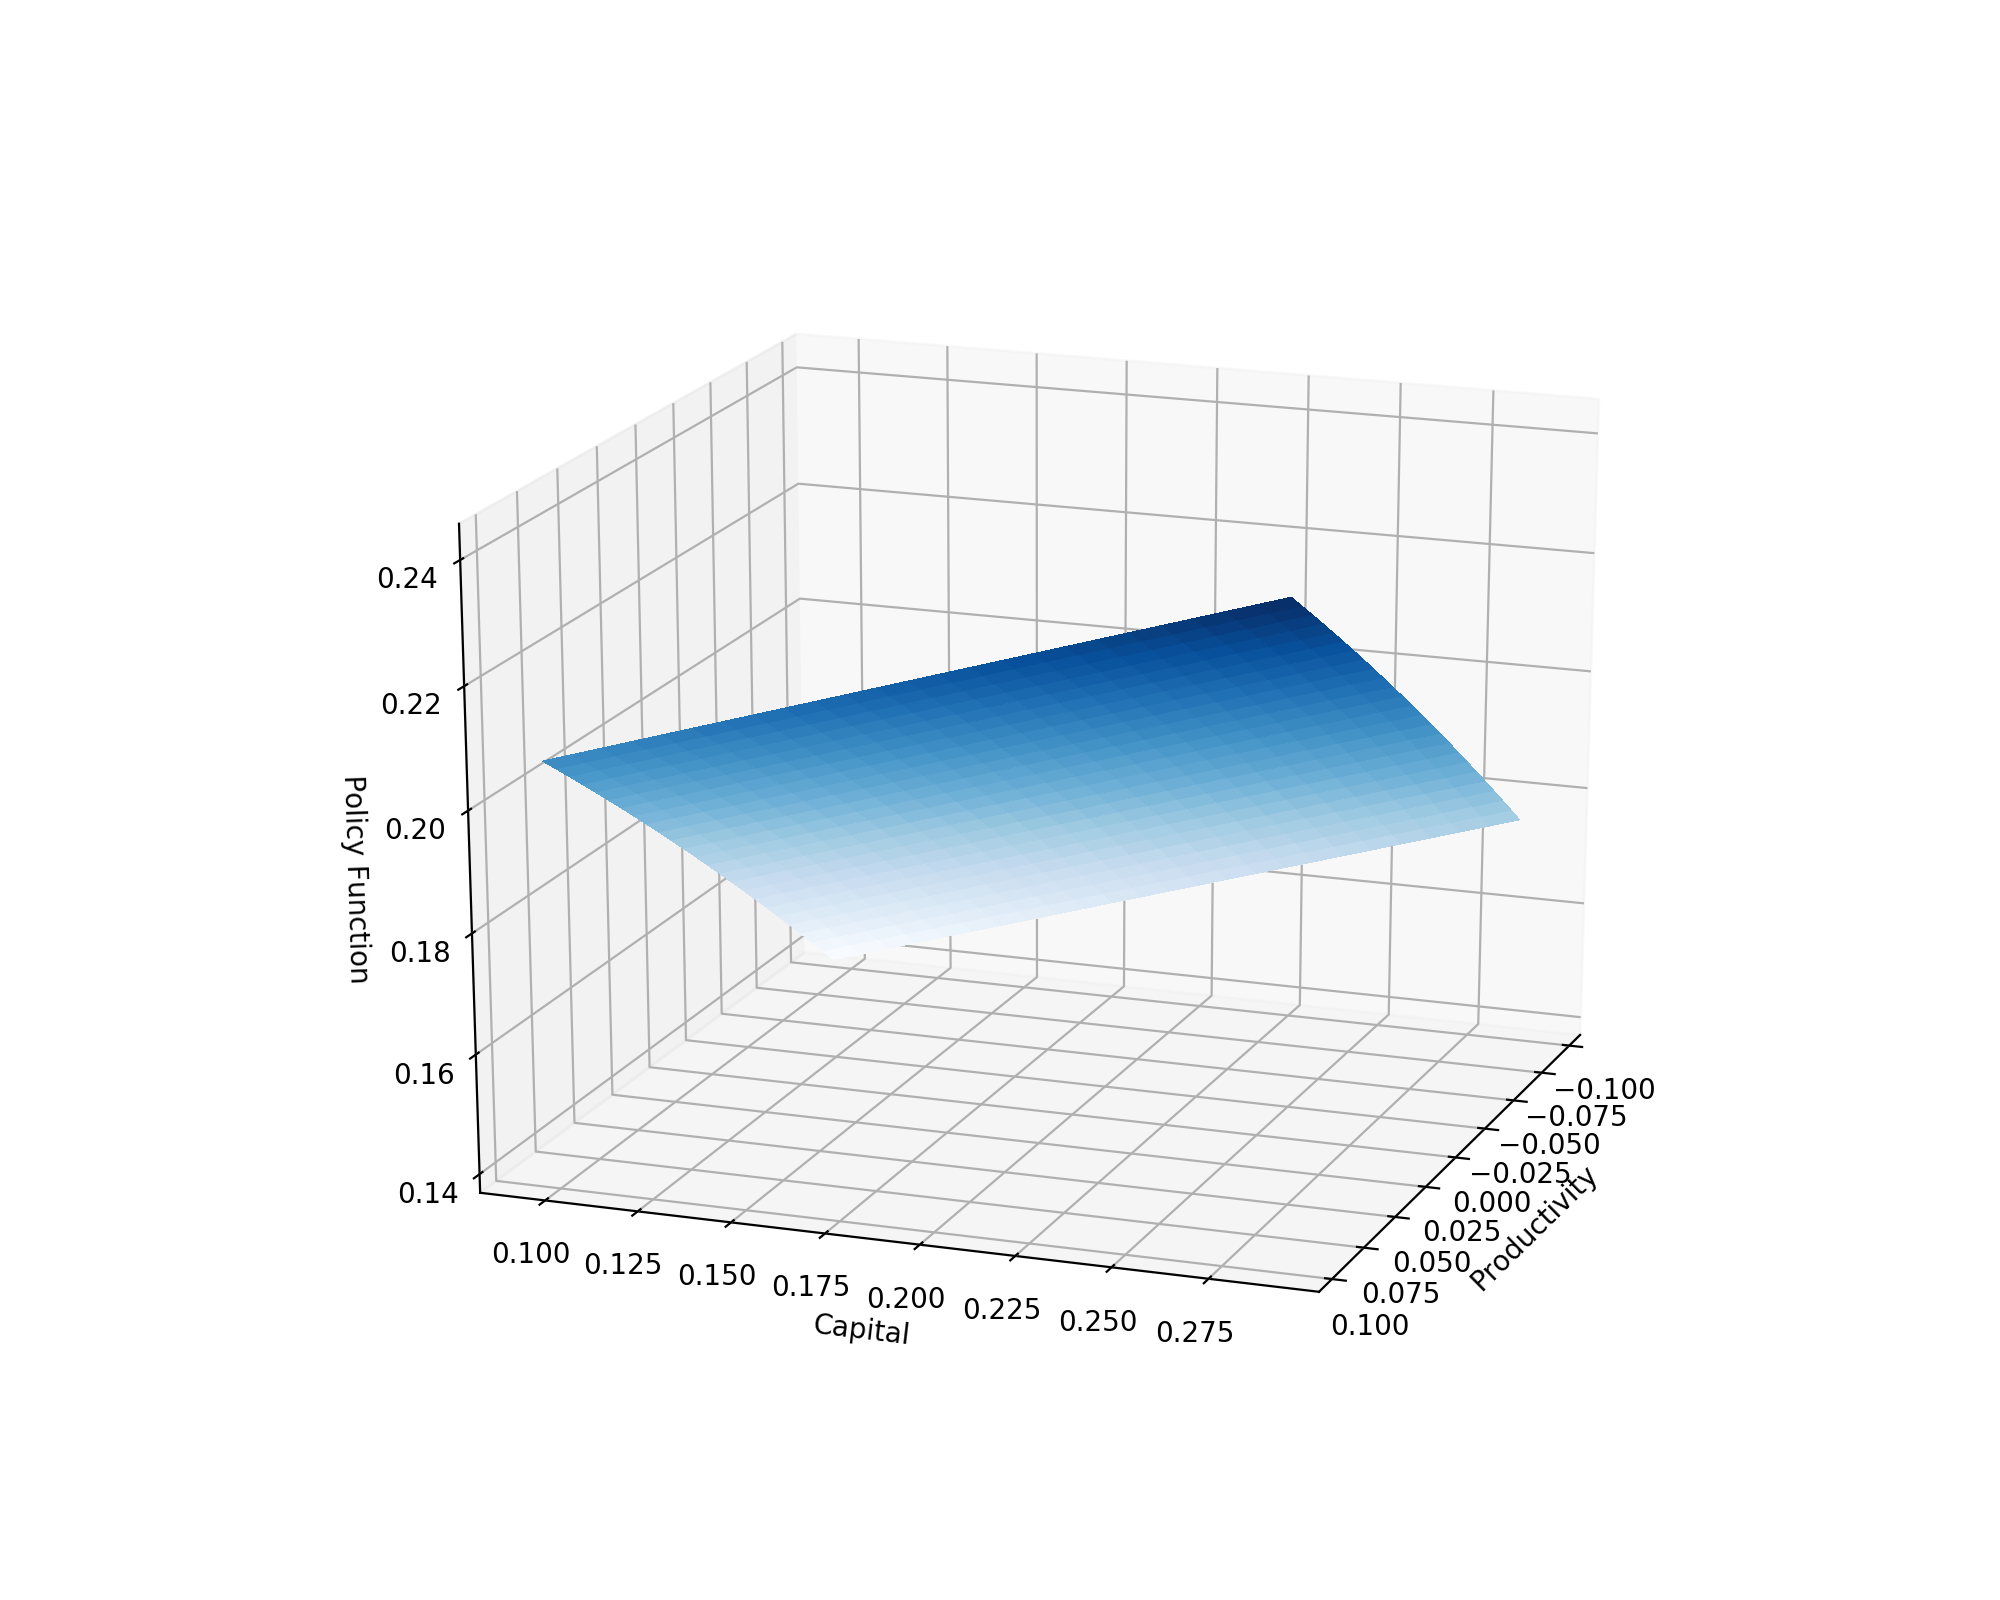

In [292]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
zmat, kmat = np.meshgrid(kgrid, zgrid)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optk, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Productivity')
ax.set_ylabel(r'Capital')
ax.set_zlabel(r'Policy Function')

## Business Cycle Moments and Time Series

## Exercise 4

In [14]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import statsmodels.api as sm
import pandas as pd

In [15]:
# Real GDP
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
GDP = web.DataReader("GDPC1", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logGDP = np.log(GDP.values)

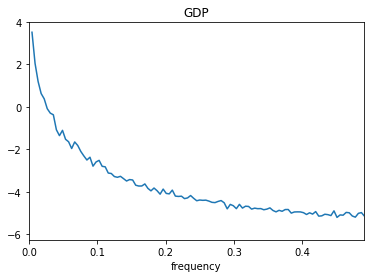

In [16]:
GDPfreq, GDPper = sig.periodogram(logGDP, axis=0)
plt.plot(GDPfreq[1:], np.log(GDPper[1:]))
plt.title('GDP')
plt.xlabel('frequency')
plt.xlim(0, 0.49)
plt.show()

In [17]:
# Real Consumption
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
CONS = web.DataReader("PCECTPI", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
CONS = CONS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logCONS = np.log(CONS.values)

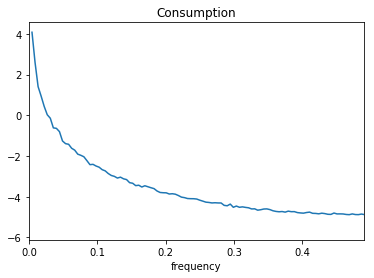

In [18]:
CONSfreq, CONSper = sig.periodogram(logCONS, axis=0)
plt.plot(CONSfreq[1:], np.log(CONSper[1:]))
plt.title('Consumption')
plt.xlabel('frequency')
plt.xlim(0, 0.49)
plt.show()

In [19]:
# Real Investment
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
INV = web.DataReader("GPDIC1", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logINV = np.log(INV.values)

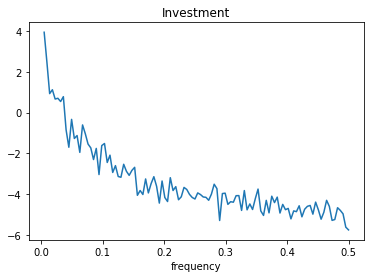

In [20]:
INVfreq, INVper = sig.periodogram(logINV, axis=0)
plt.plot(INVfreq[1:], np.log(INVper[1:]))
plt.title('Investment')
plt.xlabel('frequency')
plt.show()

In [21]:
# GDP Deflator
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
DEF = web.DataReader("GDPDEF", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logDEF = np.log(DEF.values)

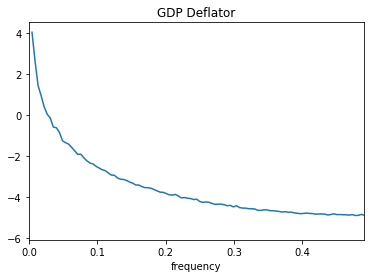

In [22]:
DEFfreq, DEFper = sig.periodogram(logDEF, axis=0)
plt.plot(DEFfreq[1:], np.log(DEFper[1:]))
plt.title('GDP Deflator')
plt.xlabel('frequency')
plt.xlim(0, 0.49)
plt.show()

## Exercise 5

In [23]:
GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, 1600)
CONScy, CONStr = sm.tsa.filters.hpfilter(logCONS, 1600)
INVcy, INVtr = sm.tsa.filters.hpfilter(logINV, 1600)
DEFcy, DEFtr = sm.tsa.filters.hpfilter(logDEF, 1600)

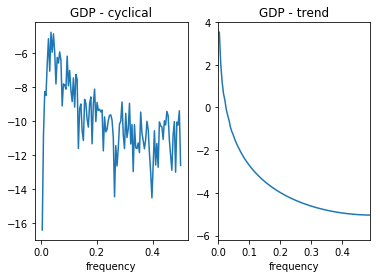

In [24]:
GDPcyfreq, GDPcyper = sig.periodogram(GDPcy, axis=0)
GDPtrfreq, GDPtrper = sig.periodogram(GDPtr, axis=0)
plt.subplot(121)
plt.plot(GDPcyfreq[1:], np.log(GDPcyper[1:]))
plt.title('GDP - cyclical')
plt.xlabel('frequency')
plt.subplot(122)
plt.plot(GDPtrfreq[1:], np.log(GDPtrper[1:]))
plt.title('GDP - trend')
plt.xlabel('frequency')
plt.xlim(0.0, 0.49)
plt.show()

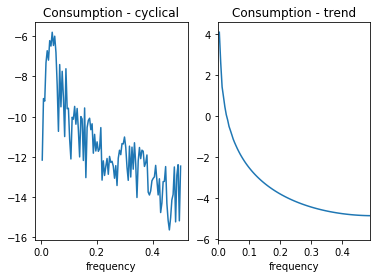

In [25]:
CONScyfreq, CONScyper = sig.periodogram(CONScy, axis=0)
CONStrfreq, CONStrper = sig.periodogram(CONStr, axis=0)
plt.subplot(121)
plt.plot(CONScyfreq[1:], np.log(CONScyper[1:]))
plt.title('Consumption - cyclical')
plt.xlabel('frequency')
plt.subplot(122)
plt.plot(CONStrfreq[1:], np.log(CONStrper[1:]))
plt.title('Consumption - trend')
plt.xlabel('frequency')
plt.xlim(0.0, 0.49)
plt.show()

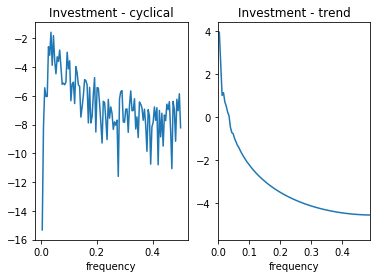

In [26]:
INVcyfreq, INVcyper = sig.periodogram(INVcy, axis=0)
INVtrfreq, INVtrper = sig.periodogram(INVtr, axis=0)
plt.subplot(121)
plt.plot(INVcyfreq[1:], np.log(INVcyper[1:]))
plt.title('Investment - cyclical')
plt.xlabel('frequency')
plt.subplot(122)
plt.plot(INVtrfreq[1:], np.log(INVtrper[1:]))
plt.title('Investment - trend')
plt.xlabel('frequency')
plt.xlim(0.0, 0.49)
plt.show()

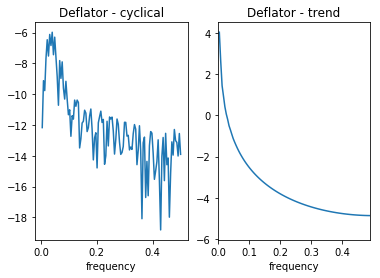

In [27]:
DEFcyfreq, DEFcyper = sig.periodogram(DEFcy, axis=0)
DEFtrfreq, DEFtrper = sig.periodogram(DEFtr, axis=0)
plt.subplot(121)
plt.plot(DEFcyfreq[1:], np.log(DEFcyper[1:]))
plt.title('Deflator - cyclical')
plt.xlabel('frequency')
plt.subplot(122)
plt.plot(DEFtrfreq[1:], np.log(DEFtrper[1:]))
plt.title('Deflator - trend')
plt.xlabel('frequency')
plt.xlim(0.0, 0.49)
plt.show()

In [28]:
x = np.array([100, 400, 1600, 6400, 25600])
z = np.array(['GDP', 'Consumption', 'Investment', 'Deflator'])
y = np.zeros((4, 5, 3))
for i in range(4):
    for j in range(5):
        GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, j)
        CONScy, CONStr = sm.tsa.filters.hpfilter(logCONS, j)
        INVcy, INVtr = sm.tsa.filters.hpfilter(logINV, j)
        DEFcy, DEFtr = sm.tsa.filters.hpfilter(logDEF, j)
        df = pd.DataFrame([GDPcy, CONScy, INVcy, DEFcy])
        df = pd.DataFrame.transpose(df)
        y[:, j, 0] = pd.DataFrame.std(df)
        y[i, j, 1] = pd.Series.autocorr(df[i])
        y[i, j, 2] = df[i].corr(df[0])
        print(z[i] + " lambda=" +str( x[j] )+' standard deviation ' + str(y[i, j, 0]))
        print(z[i] + " lambda=" +str( x[j] )+' autocorrelation ' + str(y[i, j, 1]))
        print(z[i] + " lambda=" +str( x[j] )+' correlation with GDP ' + str(y[i, j, 2]))

GDP lambda=100 standard deviation 0.0
GDP lambda=100 autocorrelation nan
GDP lambda=100 correlation with GDP nan
GDP lambda=400 standard deviation 0.00300157782937
GDP lambda=400 autocorrelation -0.204022397505
GDP lambda=400 correlation with GDP 1.0
GDP lambda=1600 standard deviation 0.00352469334973
GDP lambda=1600 autocorrelation -0.0413529502375
GDP lambda=1600 correlation with GDP 1.0
GDP lambda=6400 standard deviation 0.00386976376711
GDP lambda=6400 autocorrelation 0.0601251240206
GDP lambda=6400 correlation with GDP 1.0
GDP lambda=25600 standard deviation 0.0041403806996
GDP lambda=25600 autocorrelation 0.132754949625
GDP lambda=25600 correlation with GDP 1.0
Consumption lambda=100 standard deviation 0.0
Consumption lambda=100 autocorrelation nan
Consumption lambda=100 correlation with GDP nan
Consumption lambda=400 standard deviation 0.00123534319905
Consumption lambda=400 autocorrelation -0.0681798238259
Consumption lambda=400 correlation with GDP 0.141343770623
Consumption l

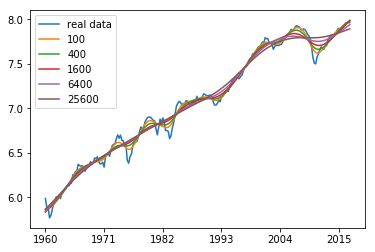

In [29]:
x1 = sm.tsa.filters.hpfilter(logINV, 100)[1]
x2 = sm.tsa.filters.hpfilter(logINV, 400)[1]
x3 = sm.tsa.filters.hpfilter(logINV, 1600)[1]
x4 = sm.tsa.filters.hpfilter(logINV, 6400)[1]
x5 = sm.tsa.filters.hpfilter(logINV, 25600)[1]
plt.plot(logINV, label = 'real data')
plt.plot(x1, label = '100')
plt.plot(x2, label = '400')
plt.plot(x3, label = '1600')
plt.plot(x4, label = '6400')
plt.plot(x5, label = '25600')
x = range(0, 224, int(215/5))
labels = ["1960", "1971", "1982", "1993", "2004", "2015"]
plt.xticks(x, labels)
plt.legend()
plt.show()

## Exercise 6

In [311]:
GDPl = sp.signal.detrend(logGDP, type = "linear")
GDPbk = sm.tsa.filters.bkfilter(logGDP, 6, 32, 8)
GDPd = logGDP[1:] - logGDP[:-1]

CONSl = sp.signal.detrend(logCONS, type = "linear")
CONSbk = sm.tsa.filters.bkfilter(logCONS, 6, 32, 8)
CONSd = logCONS[1:] - logCONS[:-1]

INVl = sp.signal.detrend(logINV, type = "linear")
INVbk = sm.tsa.filters.bkfilter(logINV, 6, 32, 8)
INVd = logINV[1:] - logINV[:-1]

DEFl = sp.signal.detrend(logDEF, type = "linear")
DEFbk = sm.tsa.filters.bkfilter(logDEF, 6, 32, 8)
DEFd = logDEF[1:] - logDEF[:-1]

In [313]:
# Government Spending
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
GOV = web.DataReader("W068RCQ027SBEA", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logGOV = np.log(GOV.values)

GOVcy = sm.tsa.filters.hpfilter(logGOV, 1600)[0]
GOVl = sp.signal.detrend(logGOV, type = "linear")
GOVbk = sm.tsa.filters.bkfilter(logGOV, 6, 32, 8)
GOVd = logGOV[1:] - logGOV[:-1]

In [300]:
# Export
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
EXP = web.DataReader("EXPGSC1", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logEXP = np.log(EXP.values)
EXPcy = sm.tsa.filters.hpfilter(logEXP, 1600)[0]
EXPl = sp.signal.detrend(logEXP, type = "linear")
EXPbk = sm.tsa.filters.bkfilter(logEXP, 6, 32, 8)
EXPd = logEXP[1:] - logEXP[:-1]

In [301]:
# Import
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
INP = web.DataReader("IMPGSC1", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logINP = np.log(INP.values)
INPcy = sm.tsa.filters.hpfilter(logINP, 1600)[0]
INPl = sp.signal.detrend(logINP, type = "linear")
INPbk = sm.tsa.filters.bkfilter(logINP, 6, 32, 8)
INPd = logINP[1:] - logINP[:-1]

In [302]:
# Employment
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2015, 12, 31)

# download data from FRED using pandas datareader
# this series is seasonally unadjusted industrial production at monthly frequencies
EMP = web.DataReader("LREM25TTUSQ156N", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logEMP = np.log(EMP.values)
EMPcy = sm.tsa.filters.hpfilter(logEMP, 1600)[0]
EMPl = sp.signal.detrend(logEMP, type = "linear")
EMPbk = sm.tsa.filters.bkfilter(logEMP, 6, 32, 8)
EMPd = logEMP[1:] - logEMP[:-1]

In [303]:
# Hours 
HRS = web.DataReader("AWHMAN", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
HRS = HRS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logHRS = np.log(HRS.values)
HRScy = sm.tsa.filters.hpfilter(logHRS, i)[0]
HRSl = sp.signal.detrend(logHRS, type = "linear")
HRSbk = sm.tsa.filters.bkfilter(logHRS, 6, 32, 8)
HRSd = logHRS[1:] - logHRS[:-1]

In [304]:
# Total Labor
LAB = web.DataReader("CLF16OV", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
LAB = HRS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logLAB = np.log(LAB.values)
LABcy = sm.tsa.filters.hpfilter(logLAB, 1600)[0]
LABl = sp.signal.detrend(logLAB, type = "linear")
LABbk = sm.tsa.filters.bkfilter(logLAB, 6, 32, 8)
LABd = logLAB[1:] - logLAB[:-1]

In [305]:
# Wages
WAG = web.DataReader("A576RC1", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
WAG = WAG.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logWAG = np.log(WAG.values)
WAGcy = sm.tsa.filters.hpfilter(logWAG, 1600)[0]
WAGl = sp.signal.detrend(logWAG, type = "linear")
WAGbk = sm.tsa.filters.bkfilter(logWAG, 6, 32, 8)
WAGd = logWAG[1:] - logWAG[:-1]

In [306]:
# Interest Rate
INT = web.DataReader("FEDFUNDS", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
INT = INT.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logINT = np.log(INT.values)
INTcy = sm.tsa.filters.hpfilter(logINT, 1600)[0]
INTl = sp.signal.detrend(logINT, type = "linear")
INTbk = sm.tsa.filters.bkfilter(logINT, 6, 32, 8)
INTd = logINT[1:] - logINT[:-1]

In [315]:
# Money Supply
MS = web.DataReader("M2SL", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
MS = MS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logMS = np.log(MS.values)
MScy = sm.tsa.filters.hpfilter(logMS, 1600)[0]
MSl = sp.signal.detrend(logMS, type = "linear")
MSbk = sm.tsa.filters.bkfilter(logMS, 6, 32, 8)
MSd = logMS[1:] - logMS[:-1]

In [316]:
# CPI
CPI = web.DataReader("CPIAUCSL", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
CPI = CPI.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logCPI = np.log(CPI.values)
CPIcy = sm.tsa.filters.hpfilter(logCPI, 1600)[0]
CPIl = sp.signal.detrend(logCPI, type = "linear")
CPIbk = sm.tsa.filters.bkfilter(logCPI, 6, 32, 8)
CPId = logCPI[1:] - logCPI[:-1]

In [307]:
# Productivity
PRO = web.DataReader("MPU4910063", "fred", start, end) 

# take the natural log of the series and convert to numpy array
logPRO = np.log(PRO.values)
PROcy = sm.tsa.filters.hpfilter(logPRO, 400)[0]
PROl = sp.signal.detrend(logPRO, type = "linear")
PRObk = sm.tsa.filters.bkfilter(logPRO, 6, 32, 8)
PROd = logPRO[1:] - logPRO[:-1]

In [332]:
# Unemployment
UEM = web.DataReader("UNRATE", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
UEM = UEM.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logUEM = np.log(UEM.values)
UEMcy = sm.tsa.filters.hpfilter(logUEM, 1600)[0]
UEMl = sp.signal.detrend(logUEM, type = "linear")
UEMbk = sm.tsa.filters.bkfilter(logUEM, 6, 32, 8)
UEMd = logUEM[1:] - logUEM[:-1]

In [326]:
# Participation rate
PAR = web.DataReader("CIVPART", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
PAR = PAR.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logPAR = np.log(PAR.values)
PARcy = sm.tsa.filters.hpfilter(logPAR, 1600)[0]
PARl = sp.signal.detrend(logPAR, type = "linear")
PARbk = sm.tsa.filters.bkfilter(logPAR, 6, 32, 8)
PARd = logPAR[1:] - logPAR[:-1]

## BK Filter

In [327]:
df = pd.DataFrame([GDPbk.T[0], CONSbk.T[0], INVbk.T[0], GOVbk.T[0], EXPbk.T[0], INPbk.T[0], EMPbk.T[0], HRSbk.T[0], LABbk.T[0], WAGbk.T[0], INTbk.T[0], \
                   MSbk.T[0], DEFbk.T[0], CPIbk.T[0], PRObk.T[0], UEMbk.T[0], PARbk.T[0]])
df = pd.DataFrame.transpose(df)

sd = pd.DataFrame.std(df)
corr = np.zeros((2, 17))
for i in range(17):
    corr[0, i] = pd.Series.autocorr(df[i])
    corr[1, i] = df[i].corr(df[0])
tab = pd.DataFrame([sd, corr[0,:], corr[1,:]])
tab = pd.DataFrame.transpose(tab)
index=['GDP', 'Consumption', 'Investment', 'Goverment Spending', 'Exports', 'Imports', 'Employment', 'Hours', \
       'Total Labor', 'Nominal Wages', 'Nominal Interest Rate', 'Money Supply', 'GDP deflator', 'CPI', 'Labor Productivity', 'Unemployment', 'Participation Rate']
tab.index = index
tab=tab.rename(columns = {0:'standard deviation', 1:'Autocorrelation', 2:'Correlation -w- GDP'})
tab

,standard deviation,Autocorrelation,Correlation -w- GDP
GDP,0.010918,0.895701,1.000000
Consumption,0.006283,0.929521,-0.319094
Investment,0.050021,0.882251,0.920985
Goverment Spending,0.012031,0.908610,-0.420774
Exports,0.029890,0.882892,0.518073
Imports,0.035237,0.881200,0.806634
Employment,0.005782,0.904208,0.773043
Hours,0.007550,0.866622,0.814208
Total Labor,0.007550,0.866622,0.814208
Nominal Wages,0.011008,0.906612,0.532575


## HP Filter

In [328]:
df = pd.DataFrame([GDPcy, CONScy, INVcy, GOVcy, EXPcy, INPcy, EMPcy, HRScy, LABcy, WAGcy, INTcy, \
                   MScy, DEFcy, CPIcy, PROcy, UEMcy, PARcy])
df = pd.DataFrame.transpose(df)

sd = pd.DataFrame.std(df)
corr = np.zeros((2, 17))
for i in range(17):
    corr[0, i] = pd.Series.autocorr(df[i])
    corr[1, i] = df[i].corr(df[0])
tab = pd.DataFrame([sd, corr[0,:], corr[1,:]])
tab = pd.DataFrame.transpose(tab)
index=['GDP', 'Consumption', 'Investment', 'Goverment Spending', 'Exports', 'Imports', 'Employment', 'Hours', \
       'Total Labor', 'Nominal Wages', 'Nominal Interest Rate', 'Money Supply', 'GDP deflator', 'CPI', 'Labor Productivity', 'Unemployment', 'Participation Rate']
tab.index = index
tab=tab.rename(columns = {0:'standard deviation', 1:'Autocorrelation', 2:'Correlation -w- GDP'})
tab

,standard deviation,Autocorrelation,Correlation -w- GDP
GDP,0.004140,0.132755,1.000000
Consumption,0.001752,0.223661,0.144059
Investment,0.021786,0.117160,0.796580
Goverment Spending,0.017383,0.775408,-0.013082
Exports,0.042104,0.662957,0.221285
Imports,0.048818,0.783821,0.307339
Employment,0.009861,0.504570,0.171654
Hours,0.005280,0.476940,0.532882
Total Labor,0.009206,0.774144,0.413542
Nominal Wages,0.015965,0.891311,0.157047


## Linear Filter

In [329]:
df = pd.DataFrame([GDPl.T[0], CONSl.T[0], INVl.T[0], GOVl.T[0], EXPl.T[0], INPl.T[0], EMPl.T[0], HRSl.T[0], LABl.T[0], WAGl.T[0], INTl.T[0], \
                   MSl.T[0], DEFl.T[0], CPIl.T[0], PROl.T[0], UEMl.T[0], PARl.T[0]])
df = pd.DataFrame.transpose(df)

sd = pd.DataFrame.std(df)
corr = np.zeros((2, 17))
for i in range(17):
    corr[0, i] = pd.Series.autocorr(df[i])
    corr[1, i] = df[i].corr(df[0])
tab = pd.DataFrame([sd, corr[0,:], corr[1,:]])
tab = pd.DataFrame.transpose(tab)
index=['GDP', 'Consumption', 'Investment', 'Goverment Spending', 'Exports', 'Imports', 'Employment', 'Hours', \
       'Total Labor', 'Nominal Wages', 'Nominal Interest Rate', 'Money Supply', 'GDP deflator', 'CPI', 'Labor Productivity', 'Unemployment', 'Participation Rate']
tab.index = index
tab=tab.rename(columns = {0:'standard deviation', 1:'Autocorrelation', 2:'Correlation -w- GDP'})
tab

,standard deviation,Autocorrelation,Correlation -w- GDP
GDP,8.283782e-16,0.035532,1.000000
Consumption,3.977141e-16,0.190368,0.138818
Investment,5.373967e-16,0.089495,0.012558
Goverment Spending,7.239050e-16,0.197611,0.087275
Exports,5.482916e-16,0.297055,-0.029346
Imports,5.547487e-16,0.394768,0.088457
Employment,4.319571e-16,0.011424,0.040692
Hours,2.653941e-16,-0.029553,0.010789
Total Labor,2.653941e-16,-0.029553,0.010789
Nominal Wages,7.590043e-16,0.212601,-0.004077


## First Differencing

In [333]:
df = pd.DataFrame([GDPd.T[0], CONSd.T[0], INVd.T[0], GOVd.T[0], EXPd.T[0], INPd.T[0], EMPd.T[0], HRSd.T[0], LABd.T[0], WAGd.T[0], INTd.T[0], \
                   MSd.T[0], DEFd.T[0], CPId.T[0], PROd.T[0], UEMd.T[0], PARd.T[0]])
df = pd.DataFrame.transpose(df)

sd = pd.DataFrame.std(df)
corr = np.zeros((2, 17))
for i in range(17):
    corr[0, i] = pd.Series.autocorr(df[i])
    corr[1, i] = df[i].corr(df[0])
tab = pd.DataFrame([sd, corr[0,:], corr[1,:]])
tab = pd.DataFrame.transpose(tab)
index=['GDP', 'Consumption', 'Investment', 'Goverment Spending', 'Exports', 'Imports', 'Employment', 'Hours', \
       'Total Labor', 'Nominal Wages', 'Nominal Interest Rate', 'Money Supply', 'GDP deflator', 'CPI', 'Labor Productivity', 'Unemployment', 'Participation Rate']
tab.index = index
tab=tab.rename(columns = {0:'standard deviation', 1:'Autocorrelation', 2:'Correlation -w- GDP'})
tab

,standard deviation,Autocorrelation,Correlation -w- GDP
GDP,0.008334,0.348443,1.000000
Consumption,0.006406,0.835140,-0.079344
Investment,0.040271,0.216472,0.810242
Goverment Spending,0.013695,0.117236,-0.008391
Exports,0.035502,-0.268597,0.195617
Imports,0.033454,0.064123,0.402598
Employment,0.010024,-0.556180,0.169293
Hours,0.006284,0.201026,0.506237
Total Labor,0.006284,0.201026,0.506237
Nominal Wages,0.009522,0.553962,0.335460
